In [2]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [3]:
df = pd.DataFrame()

In [4]:
df['X1'] = [1, 2, 3, 4, 5, 6, 6, 7, 9, 9]
df['X2'] = [5, 3, 6, 8, 1, 9, 5, 8, 9, 2]
df['label'] = [1, 1, 0, 1, 0, 1, 0, 1, 0, 0]

In [5]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


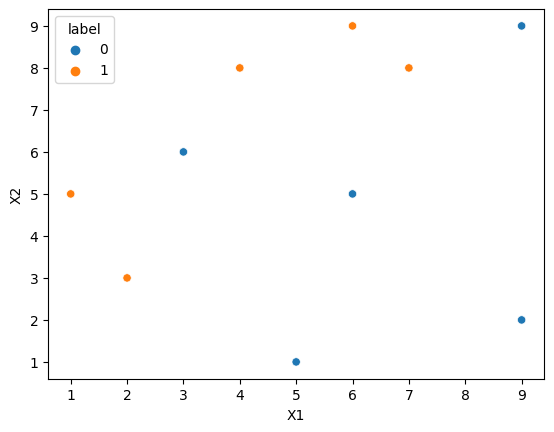

In [6]:
import seaborn as sns
sns.scatterplot(x = df['X1'], y = df['X2'], hue=df['label']);

In [7]:
df['weights'] = 1/df.shape[0]

In [8]:
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
dt1 = DecisionTreeClassifier(max_depth=1)

In [11]:
X = df.iloc[:, 0:2].values
y = df.iloc[:, 2].values

In [12]:
dt1.fit(X, y)

DecisionTreeClassifier(max_depth=1)

In [13]:
from sklearn.tree import plot_tree

[Text(0.5, 0.75, 'X[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]')]

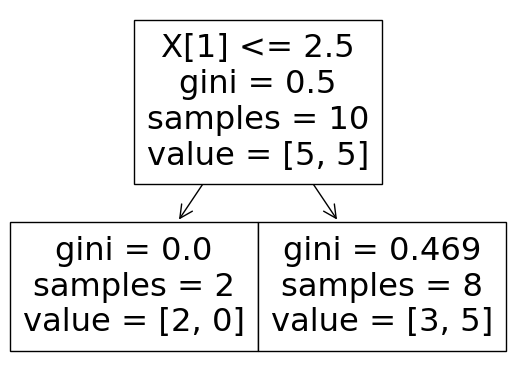

In [14]:
plot_tree(dt1)

<AxesSubplot:>

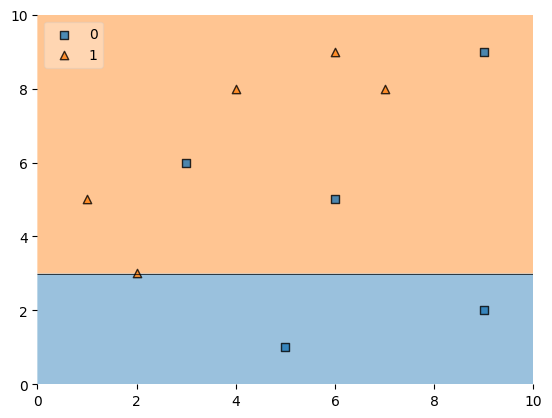

In [15]:
plot_decision_regions(X, y, clf = dt1, legend =2)

In [16]:
df['y_pred'] = dt1.predict(X)

In [17]:
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


In [18]:
def calculate_model_weight(error):
    return 0.5*np.log((1-error)/(error))

In [19]:
alpha1  = calculate_model_weight(0.3)
alpha1

0.42364893019360184

In [20]:
# update weights
def update_row_weights(row, alpha=0.423):
    if row['label']== row['y_pred']:
        return row['weights']*np.exp(-alpha)
    else:
        return row['weights']* np.exp(alpha)

In [21]:
df['updated_weights'] = df.apply(update_row_weights, axis=1)

In [22]:
df

,X1,X2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,1,0.152653
3,4,8,1,0.1,1,0.065508
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,1,0.065508
6,6,5,0,0.1,1,0.152653
7,7,8,1,0.1,1,0.065508
8,9,9,0,0.1,1,0.152653
9,9,2,0,0.1,0,0.065508


In [23]:
df['updated_weights'].sum()

0.9165153319682015

In [24]:
df['normalized_weights'] = df['updated_weights']/df['updated_weights'].sum()

In [25]:
df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,1,0.152653,0.166559
3,4,8,1,0.1,1,0.065508,0.071475
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,1,0.065508,0.071475
6,6,5,0,0.1,1,0.152653,0.166559
7,7,8,1,0.1,1,0.065508,0.071475
8,9,9,0,0.1,1,0.152653,0.166559
9,9,2,0,0.1,0,0.065508,0.071475


In [26]:
df['normalized_weights'].sum()

1.0

In [27]:
df['cumsum_upper'] = np.cumsum(df['normalized_weights'])

In [28]:
df['cumsum_lower'] = df['cumsum_upper'] - df['normalized_weights']

In [29]:
df[['X1', 'X2', 'label', 'weights', 'y_pred', 'updated_weights', 'cumsum_upper', 'cumsum_upper']]

,X1,X2,label,weights,y_pred,updated_weights,cumsum_upper,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.071475,0.071475
1,2,3,1,0.1,1,0.065508,0.142950,0.142950
2,3,6,0,0.1,1,0.152653,0.309508,0.309508
3,4,8,1,0.1,1,0.065508,0.380983,0.380983
4,5,1,0,0.1,0,0.065508,0.452458,0.452458
5,6,9,1,0.1,1,0.065508,0.523933,0.523933
6,6,5,0,0.1,1,0.152653,0.690492,0.690492
7,7,8,1,0.1,1,0.065508,0.761967,0.761967
8,9,9,0,0.1,1,0.152653,0.928525,0.928525
9,9,2,0,0.1,0,0.065508,1.000000,1.000000


In [30]:
def create_new_dataset(df):
    indices = []
    for i in range(df.shape[0]):
        a = np.random.random()
        for index, row in df.iterrows():
            if row['cumsum_upper']> a and a > row['cumsum_lower']:
                indices.append(index)
    return indices        


In [31]:
index_value = create_new_dataset(df)

In [32]:
index_value                # upsampling

[8, 2, 2, 0, 8, 6, 6, 2, 5, 0]

In [33]:
second_df = df.iloc[index_value,[0, 1, 2, 3]]

In [34]:
second_df

,X1,X2,label,weights
8,9,9,0,0.1
2,3,6,0,0.1
2,3,6,0,0.1
0,1,5,1,0.1
8,9,9,0,0.1
6,6,5,0,0.1
6,6,5,0,0.1
2,3,6,0,0.1
5,6,9,1,0.1
0,1,5,1,0.1


In [35]:
dt2 = DecisionTreeClassifier(max_depth=1)

In [36]:
X = second_df.iloc[:, 0:2].values
y = second_df.iloc[:,2].values

In [37]:
dt2.fit(X, y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'X[0] <= 2.0\ngini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.75, 0.25, 'gini = 0.219\nsamples = 8\nvalue = [7, 1]')]

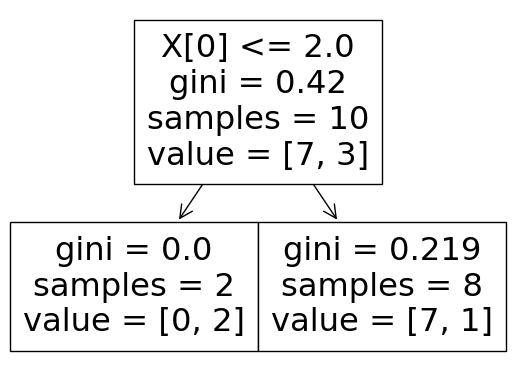

In [38]:
plot_tree(dt2)

<AxesSubplot:>

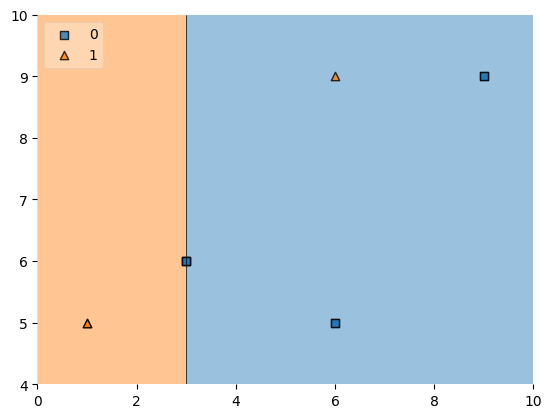

In [39]:
plot_decision_regions(X, y, clf=dt2, legend=2)

In [40]:
second_df['y_pred'] = dt2.predict(X)

In [41]:
second_df

,X1,X2,label,weights,y_pred
8,9,9,0,0.1,0
2,3,6,0,0.1,0
2,3,6,0,0.1,0
0,1,5,1,0.1,1
8,9,9,0,0.1,0
6,6,5,0,0.1,0
6,6,5,0,0.1,0
2,3,6,0,0.1,0
5,6,9,1,0.1,0
0,1,5,1,0.1,1


In [42]:
alpha2 = calculate_model_weight(0.1)

In [43]:
alpha2

1.0986122886681098

In [44]:
# step 4 - update weights
def update_row_weights(row, alpha=1.09):
    if row['label']== row['y_pred']:
        return row['weights']*np.exp(-alpha)
    else:
        return row['weights']* np.exp(alpha)

In [45]:
second_df['updated_weights'] = second_df.apply(update_row_weights, axis=1)

In [46]:
second_df

,X1,X2,label,weights,y_pred,updated_weights
8,9,9,0,0.1,0,0.033622
2,3,6,0,0.1,0,0.033622
2,3,6,0,0.1,0,0.033622
0,1,5,1,0.1,1,0.033622
8,9,9,0,0.1,0,0.033622
6,6,5,0,0.1,0,0.033622
6,6,5,0,0.1,0,0.033622
2,3,6,0,0.1,0,0.033622
5,6,9,1,0.1,0,0.297427
0,1,5,1,0.1,1,0.033622


In [47]:
second_df['normalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()

In [48]:
second_df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights
8,9,9,0,0.1,0,0.033622,0.056034
2,3,6,0,0.1,0,0.033622,0.056034
2,3,6,0,0.1,0,0.033622,0.056034
0,1,5,1,0.1,1,0.033622,0.056034
8,9,9,0,0.1,0,0.033622,0.056034
6,6,5,0,0.1,0,0.033622,0.056034
6,6,5,0,0.1,0,0.033622,0.056034
2,3,6,0,0.1,0,0.033622,0.056034
5,6,9,1,0.1,0,0.297427,0.495694
0,1,5,1,0.1,1,0.033622,0.056034


In [49]:
second_df['normalized_weights'].sum()

1.0

In [50]:
second_df['cumsum_upper'] = np.cumsum(second_df['normalized_weights'])

In [51]:
second_df['cumsum_lower'] = second_df['cumsum_upper']  - second_df['normalized_weights']

In [52]:
second_df[['X1', 'X2', 'label', 'weights', 'y_pred', 'normalized_weights', 'cumsum_lower', 'cumsum_upper']]

,X1,X2,label,weights,y_pred,normalized_weights,cumsum_lower,cumsum_upper
8,9,9,0,0.1,0,0.056034,0.000000,0.056034
2,3,6,0,0.1,0,0.056034,0.056034,0.112068
2,3,6,0,0.1,0,0.056034,0.112068,0.168102
0,1,5,1,0.1,1,0.056034,0.168102,0.224136
8,9,9,0,0.1,0,0.056034,0.224136,0.280170
6,6,5,0,0.1,0,0.056034,0.280170,0.336204
6,6,5,0,0.1,0,0.056034,0.336204,0.392238
2,3,6,0,0.1,0,0.056034,0.392238,0.448272
5,6,9,1,0.1,0,0.495694,0.448272,0.943966
0,1,5,1,0.1,1,0.056034,0.943966,1.000000


In [53]:
index_value = create_new_dataset(second_df)

In [54]:
third_df = second_df.iloc[index_value,[0, 1, 2, 3]]

In [55]:
third_df

,X1,X2,label,weights
6,6,5,0,0.1
5,6,9,1,0.1
8,9,9,0,0.1
6,6,5,0,0.1
8,9,9,0,0.1
6,6,5,0,0.1
6,6,5,0,0.1
6,6,5,0,0.1
6,6,5,0,0.1
6,6,5,0,0.1


In [56]:
dt3 = DecisionTreeClassifier(max_depth=1)

In [57]:
X = second_df.iloc[:, 0:2].values
y = second_df.iloc[:,2].values
dt3.fit(X, y)

DecisionTreeClassifier(max_depth=1)

<AxesSubplot:>

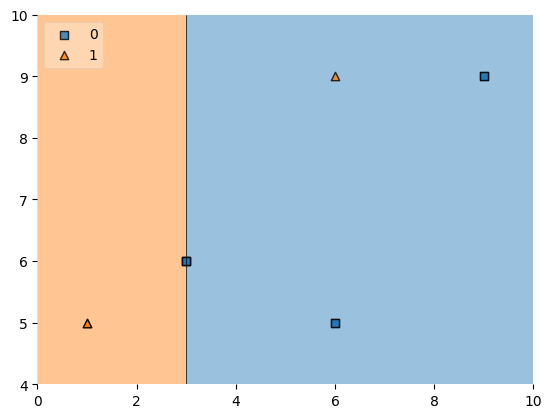

In [58]:
plot_decision_regions(X, y, clf= dt3, legend=2)

In [59]:
third_df['y_pred'] = dt3.predict(X)

In [60]:
third_df

,X1,X2,label,weights,y_pred
6,6,5,0,0.1,0
5,6,9,1,0.1,0
8,9,9,0,0.1,0
6,6,5,0,0.1,1
8,9,9,0,0.1,0
6,6,5,0,0.1,0
6,6,5,0,0.1,0
6,6,5,0,0.1,0
6,6,5,0,0.1,0
6,6,5,0,0.1,1


In [61]:
alpha3 = calculate_model_weight(0.6)

In [62]:
alpha3

-0.20273255405408214

### Prediction

In [63]:
query = np.array([1, 5]).reshape(1, 2)
dt1.predict(query)

array([1], dtype=int64)

In [64]:
dt2.predict(query)

array([1], dtype=int64)

In [ ]:
dt3.predict(query)

In [65]:
alpha1*1 + alpha2*(-1)+ alpha3*(-1)

-0.4722308044204258

In [66]:
np.sign(1.09)

1.0

In [67]:
query = np.array([9, 9]).reshape(1, 2)
dt1.predict(query)

array([1], dtype=int64)

In [68]:
dt2.predict(query)

array([0], dtype=int64)

In [69]:
dt3.predict(query)

array([0], dtype=int64)

In [70]:
alpha1*1 + alpha2*(-1)+ alpha3*(-1)

-0.4722308044204258

In [71]:
np.sign(-0.47)

-1.0